In [13]:
# LSTM for international airline passengers problem with regression framing
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from pandas import read_csv

import math


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error



In [14]:
#pip install keras
#pip install tensorflow

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM


In [15]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)



In [16]:

# fix random seed for reproducibility
np.random.seed(7)
# load the dataset

dataframe  = pd.read_csv('international-airline-passengers.csv',usecols=[1], engine='python')

#dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')

dataframe

,112
0,118
1,132
2,129
3,121
4,135
...,...
138,606
139,508
140,461
141,390


In [17]:

dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [18]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [21]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [22]:
trainX

array([[[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984557]],

       [[0.08494207]],

       [[0.08494207]],

       [[0.06177607]],

       [[0.02895753]],

       [[0.        ]],

       [[0.02702703]],

       [[0.02123553]],

       [[0.04247104]],

       [[0.07142857]],

       [[0.05984557]],

       [[0.04054055]],

       [[0.08687258]],

       [[0.12741312]],

       [[0.12741312]],

       [[0.10424709]],

       [[0.05598456]],

       [[0.01930502]],

       [[0.06949806]],

       [[0.07915059]],

       [[0.08880308]],

       [[0.14285713]],

       [[0.11389962]],

       [[0.13127413]],

       [[0.14285713]],

       [[0.18339768]],

       [[0.18339768]],

       [[0.15444016]],

       [[0.11196911]],

       [[0.08108109]],

       [[0.1196911 ]],

       [[0.12934363]],

       [[0.14671814]],

       [[0.17181468]],

       [[0.14864865]],

       [[0.15250966]],

       [[0.22007722]],

       [[0.24324

In [23]:

# create and fit the LSTM network
model = Sequential()

model.add(LSTM(4, input_shape=(1, look_back)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
93/93 - 0s - loss: 0.0434
Epoch 2/100
93/93 - 0s - loss: 0.0231
Epoch 3/100
93/93 - 0s - loss: 0.0162
Epoch 4/100
93/93 - 0s - loss: 0.0142
Epoch 5/100
93/93 - 0s - loss: 0.0133
Epoch 6/100
93/93 - 0s - loss: 0.0125
Epoch 7/100
93/93 - 0s - loss: 0.0119
Epoch 8/100
93/93 - 1s - loss: 0.0110
Epoch 9/100
93/93 - 0s - loss: 0.0099
Epoch 10/100
93/93 - 0s - loss: 0.0089
Epoch 11/100
93/93 - 0s - loss: 0.0079
Epoch 12/100
93/93 - 0s - loss: 0.0068
Epoch 13/100
93/93 - 0s - loss: 0.0057
Epoch 14/100
93/93 - 0s - loss: 0.0046
Epoch 15/100
93/93 - 0s - loss: 0.0038
Epoch 16/100
93/93 - 0s - loss: 0.0031
Epoch 17/100
93/93 - 0s - loss: 0.0026
Epoch 18/100
93/93 - 0s - loss: 0.0023
Epoch 19/100
93/93 - 0s - loss: 0.0022
Epoch 20/100
93/93 - 0s - loss: 0.0021
Epoch 21/100
93/93 - 1s - loss: 0.0021
Epoch 22/100
93/93 - 1s - loss: 0.0021
Epoch 23/100
93/93 - 0s - loss: 0.0020
Epoch 24/100
93/93 - 0s - loss: 0.0020
Epoch 25/100
93/93 - 0s - loss: 0.0020
Epoch 26/100
93/93 - 0s - loss: 0.

In [24]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)




In [25]:

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [26]:

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.79 RMSE
Test Score: 50.76 RMSE


In [29]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [31]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

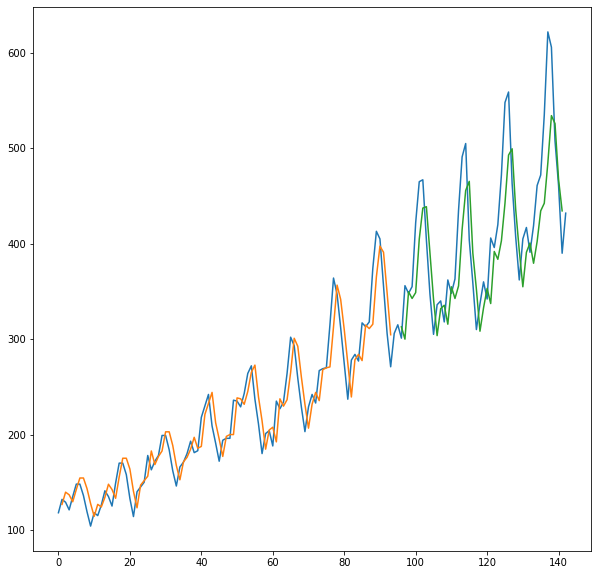

In [33]:

# plot baseline and predictions
plt.figure(figsize=(10,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)


plt.show()